<img src="./pictures/logo-insa.png" style="float:right; max-width: 60px; display: inline" alt="INSA" /></a>


# Case study and architecture presentation

*Written by Marc Budinger and Aitor Ochotorena, INSA Toulouse, France*

Before sizing a system, it is important to define all the constraints that could have an influence on the design. It is therefore advisable to list meticulously:
- the power components to size in the architecture 
- criteria and parameters useful for the selection of components 
- system usage scenarios that can a effect the selection of components
This is the target of this notebook.

### Multi-rotor drone: a complete mechatronic system

The multi-rotor concept is not new and dates from the first helicopter work. During the 1920s, George de Bothezat (United States, 1922) and Etienne Oehmichen (France, 1924)  built helicopters with fours rotors at the end of intersecting beams. However, mechanical power transmission and control were relatively complex.

*Helicopter in the 1920s (left George de_Bothezat prototype, rigth Etienne Oehmichen prototype)*  
![George de_Bothezat](./pictures/De_Bothezat_Flying_Octopus.jpg)
![Etienne Oehmichen](./pictures/helico_4_helices_etienne_oehmichen_1924.jpg)

Today thanks the developpement of:
- powerfull brushless motors, the power transmission is simplify
- MEMS sensors (gyrometer, accelerometer) and microcontrollers enable control in a very small footprint
multi-rotor becomes a reallity from micro to human body transport.

*Micro and mini drones*  
![Micro Quadcopter](./pictures/microquadcopter.jpg)
![Mikrokopter_Quadro](./pictures/mikropter_quadro.jpg)  

*Ehang 184 and Volcopter passengers drones*  
![Ehang 184](./pictures/ehang184.jpg)
![Volocopter](./pictures/volocopter.jpg)  




The multi-rotor drones can be defined as mechatronic systems with the use of mechanical, electromechanical, computer science and electronics disciplines. 

You can find [here](https://quadcopterarena.com/the-history-of-drones-and-quadcopters/) an introduction the history of Unmanned Aerial Vehicles, the quad-copters best features and their uses and applications.


### Anatomy of a drone

The  diagram of the drone components and the listing of drone component parts presented bellow comes from an article called anatomy of a drone by [MakeZine](https://makezine.com/2014/01/07/anatomy-of-a-drone/). The main components are: 
* A. **STANDARD PROP**: The same “tractor” propeller used on standard front-engine R/C airplanes.  
* B. **“PUSHER” PROP**: These contra-rotating props exactly cancel out motor torques during stationary level flight. Opposite pitch gives downdraft.  
* C. **MOTOR**: Usually a brushless electric “outrunner” type, which is more efficient, more reliable, and quieter than a brushed motor.  
* D. **MOTOR MOUNT**: Sometimes built into combination fittings with landing struts.  
* E. **LANDING GEAR**: Designs that need high ground clearance may adopt helicopter-style skids mounted directly to the body, while designs with no hanging payload may omit landing gear altogether.  
* F. **BOOM**: Shorter booms increase maneuverability, while longer booms increase stability. Booms must be tough to hold up in a crash while interfering with prop downdraft as little as possible.  
* G. **MAIN BODY**: Central “hub” from which booms radiate like spokes on a wheel. Houses battery, avionics, cameras, and sensors.  
* H. **ELECTRONIC SPEED CONTROLLER (ESC)**: Converts DC battery power into 3-phase AC for driving brushless motors.  
* I. **FLIGHT CONTROLLER**: Interprets input from receiver, GPS module, battery monitor, and onboard sensors. Regulates motor speeds, via ESCs, to provide steering, as well as triggering cameras or other payloads. Controls autopilot and other autonomous functions.  
* J. **GPS MODULE**: Often combines GPS receiver and magnetometer to provide latitude, longitude, elevation, and compass heading from a single device.  
* K. **RECEIVER**: Often a standard R/C radio receiver unit. The minimum number of channels needed to control a quad is 4, but 5 is usually recommended.  
* L. **ANTENNA**: Depending on your receiver, may be a loose wire whip or helical “rubber ducky” type.  
* M. **BATTERY**: Lithium polymer (LiPo) batteries offer the best combination of energy density, power density, and lifetime on the market.  
* N. **BATTERY MONITOR**: Provides in-flight power level monitoring to flight controller.  

*Drone anatomy*  
![anatomy-of-a-drone](./pictures/anatomy-of-a-drone.png)

The load is often a video system:  
* O. **GIMBAL**: Pivoting mount that rotates about 1, 2, or 3 axes to provide stabilization and pointing of cameras or other sensors.  
* P. **GIMBAL MOTOR**: Brushless DC motors can be used for direct-drive angular positioning, too, which requires specially-wound coils and dedicated control circuitry that have only recently become commercially available.  
* Q. **GIMBAL CONTROLLER**: Allows control of direct-drive brushless gimbal motors as if they were standard hobby servos.  
* R. **CAMERA**: GoPro or other compact HD video unit with onboard storage. Real-time streaming is possible with special equipment.  


### Mass distribution of the components
To get an idea of the magnitude of the masses of each component of a multirotor drone, we selected three commercial drones and analyzed the distribution of masses by components. The selected drone are the [MK-Quadro](http://wiki.mikrokopter.de/MK-Quadro), the [Octocopter MK 8-3500](https://flydrotec.de/uav-systeme/mikrokopter/mk8-3500-flat-okto/mk8-3500-komplettsystem) drone, both of Mikrokopter and the [Spreading Wings S1000+](https://www.dji.com/fr/spreading-wings-s1000-plus/info#specs) from DJI.

In [5]:
import pandas as pd
path='./doc/'
df = pd.read_csv(path+'MassDistribution.csv', sep=';')
df

,Group,S1000+,MK-Quadro,MK-8,DJI MG1P
0,Structure (g),2472,653,1820,3060
1,ESC (g),280,48,200,400
2,Battery (g),1932,329,1490,4000
3,Motor (g),1264,260,736,1840
4,Helice (g),104,60,104,400
5,Payload (g),3500,600,2000,14100


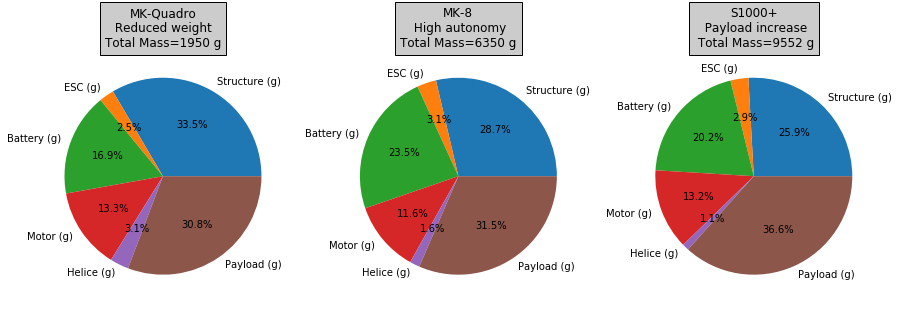

In [6]:
from matplotlib import pyplot as plt
import numpy as np

fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

ax1.pie(df['MK-Quadro'],  labels=df['Group'], autopct='%.1f%%')
ax1.set_title("MK-Quadro\n Reduced weight \nTotal Mass=%.0f g"%df['MK-Quadro'].sum(axis=0), bbox={'facecolor':'0.8', 'pad':5})
ax2.pie(df['MK-8'],  labels=df['Group'], autopct='%.1f%%')
ax2.set_title("MK-8\n High autonomy\nTotal Mass=%.0f g"%df['MK-8'].sum(axis=0), bbox={'facecolor':'0.8', 'pad':5})
ax3.pie(df['S1000+'],  labels=df['Group'], autopct='%.1f%%')
ax3.set_title("S1000+\n  Payload increase \n Total Mass=%.0f g"%df['S1000+'].sum(axis=0), bbox={'facecolor':'0.8', 'pad':5})
#ax4.pie(df['DJI MG1P'],  labels=df['Group'], autopct='%.1f%%')
#ax4.set_title("DJI MG1P carriage of tanks  \n Total Mass=%.0f g"%df['DJI MG1P'].sum(axis=0), bbox={'facecolor':'0.8', 'pad':5})


#plt.title("M\n" + "Worldwide, Oct 2017 compared to a year ago", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In the following graph we see a scale of drones by weight. Depending on what is going to be the purpose of the drone will adapt the distribution of masses to the different components. We see how Mikrokopter's MK-Quadro presents the following mass distribution.  As we can see the purpose of MK-Quadro is to reduce weight to make a light drone, where the autonomy of the battery is secondary. So we find a drone with a small battery and reduced load.  It should be noted that as the drones develop, to increase the autonomy of the battery, the mass of the structure tends to reduce .  Thus, we see that the MK-8 presents a decrease of its mass of the structure but on the other hand, the mass of the battery increases to offer autonomies of even 40 min.
Finally the S1000+ model is designed to carry relatively large masses with respect to the size of the drone offering an increase in payload being able to reach a maximum takeoff mass of 11 kg.